In [1]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


In [2]:
goog = pd.read_csv('fintech_quiz_1/goog2.csv')
hsbc = pd.read_csv('fintech_quiz_1/hsbc.csv')
goog.head(2)

,Unnamed: 0,open,high,low,close,volume
0,2021-02-01,1853.57,1922.3918,1850.93,1901.35,1602182
1,2021-02-02,1922.56,1955.7600,1914.49,1927.51,2103864


In [3]:
#dataread

AAPL_df = pd.read_csv('fintech_quiz_1/AAPL_n.csv')
BAC_df = pd.read_csv('fintech_quiz_1/BAC_n.csv')
WMT_df = pd.read_csv('fintech_quiz_1/WMT_n.csv')
AEO_df = pd.read_csv('fintech_quiz_1/AEO_n.csv')
EU_df = pd.read_csv('fintech_quiz_1/EuropeanOption873.csv')
OTM_df = pd.read_csv('fintech_quiz_1/OptionDataOTM_data.csv')

In [4]:
AAPL_df.iloc[:,2:11].head(2)

,marketAverage,marketChangeOverTime,marketClose,marketHigh,marketLow,marketNotional,marketNumberOfTrades,marketOpen,marketVolume
0,167.058,0.000000,167.150,167.55,166.67,1.319461e+08,1766,166.93,789821
1,167.182,0.000742,167.175,167.42,166.80,2.853055e+07,1143,167.21,170656


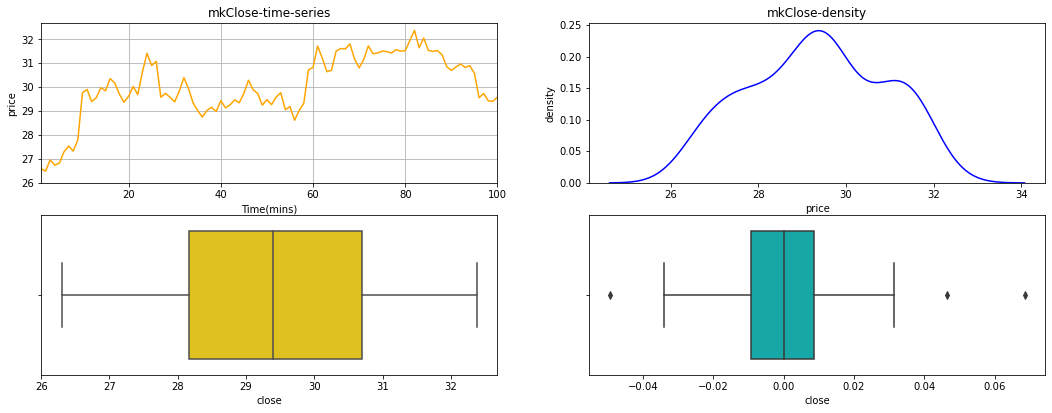

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

#Viz function

def plot_data(data):

  fig=plt.figure(figsize=(18,10))

  plt.subplot(3,2,1)
  plt.plot(data['close'], c='orange')
  plt.xlabel('Time(mins)')
  plt.ylabel('price')
  plt.xlim(1, 100)
  plt.title('mkClose-time-series')
  plt.grid('on')
  
  plt.subplot(3,2,2)
  sns.kdeplot(data['close'], color='b')
  plt.title('mkClose-density')
  plt.xlabel('price')
  plt.ylabel('density')
  
  plt.subplot(3,2,3)
  sns.boxplot(data['close'], color='gold')



  plt.subplot(3,2,4)
  sns.boxplot(( np.log(data['close']/data['close'].shift(1)) ), color='c')


  plt.show()

#Change data param for other plost

plot_data(hsbc)

<Figure size 432x432 with 0 Axes>

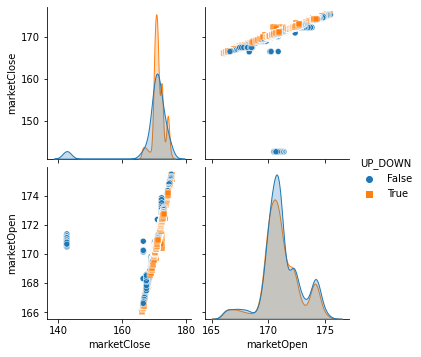

In [86]:
def pair_plot(data):
    fig=plt.figure(figsize=(6,6))
    data['UP_DOWN']=data["marketClose"]-data["marketOpen"]>0
    sns.pairplot(data, hue='UP_DOWN', markers=['o', 's'])
    plt.show()

pair_plot(AAPL_df[['marketClose','marketOpen']])

[[0.9999999948482526, 0.4320137558551327, 0.4518526147422565], [0.999999642366182, 0.8495738510529366, 0.5937306475620888], [0.9999998504181822, 0.7197452428392339, 0.6096901009898035], [0.9999964626823653, 0.45082932935528924, 0.5230484361965818]]


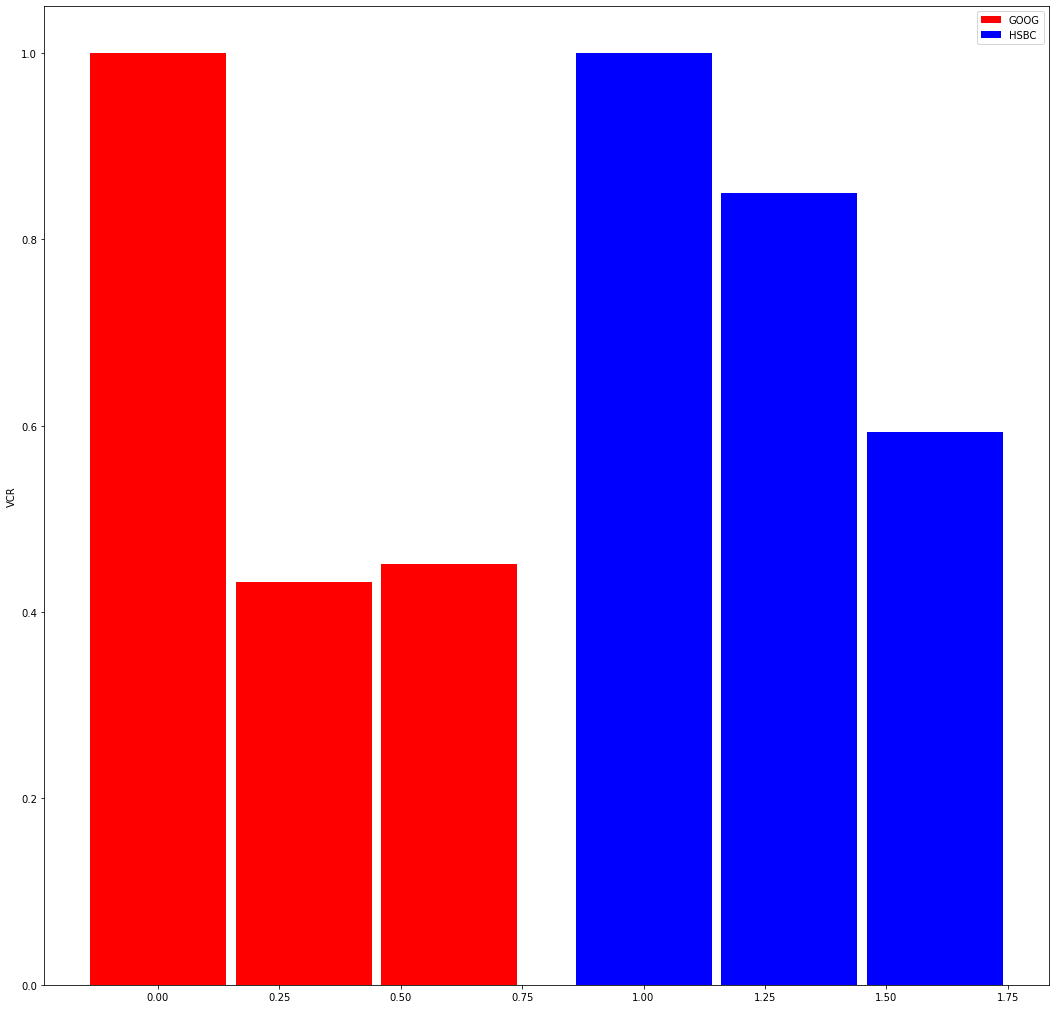

In [91]:
import statistics
from numpy import asarray
from sklearn.decomposition import TruncatedSVD
from scipy.sparse import csr_matrix
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#VCR Normalization plots 

def Plot_CVR(*argv):
    y = ["AAPL","BAC","WMT","AEO"]
    x = []
    for arg in argv:
        q = []
        ar = arg.iloc[:,2:11]
        svd = TruncatedSVD(n_components=1)
        svd.fit(ar)
        v = svd.explained_variance_ratio_.sum()
        q.append(v)
        
        scaler = MinMaxScaler()
        sc = scaler.fit_transform(ar)
        svd = TruncatedSVD(n_components=1)
        svd.fit(sc)
        vc = svd.explained_variance_ratio_.sum()
        q.append(vc)
        scaler = StandardScaler()
        sc = scaler.fit_transform(ar)
        svd = TruncatedSVD(n_components=1)
        svd.fit(sc)
        vc = svd.explained_variance_ratio_.sum()
        q.append(vc)
        #print(q)
        x.append(q)
    print(x)
    import matplotlib.pyplot as plt 
    
    fig=plt.figure(figsize=(18,18))
    bar1 = plt.bar(0, x[0][0], color= 'r',width = .28)
    bar1 = plt.bar(.3, x[0][1], color= 'r', width = .28)
    bar1 = plt.bar(.6, x[0][2], color= 'r', width = .28)
    
    bar2 = plt.bar(1.0, x[1][0], color= 'b',width = .28)
    bar2 = plt.bar(1.3, x[1][1], color= 'b', width = .28)
    bar2 = plt.bar(1.6, x[1][2], color= 'b', width = .28)
    
    
    plt.legend( (bar1,bar2), ('GOOG','HSBC') )
    plt.ylabel("VCR")
    plt.show()

Plot_CVR(AAPL_df,BAC_df,WMT_df,AEO_df)